# Project: No-show appointments




# Table of Contents

## Introduction

Data Set: No-show appointments dataset collects information from 100k medical appointments in Brazil through the source Kaggle and is focused on the question of whether or not patients show up for their appointment

  -  ‘Neighborhood’ indicates the location of the hospital.
  -  ScheduledDay’ tells us on what day the patient set up their appointment.
  -  ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program.
  -  ‘No-show’ says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.
  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

## Data Wrangling
### Importing the Data



In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

### Describing the dataset and its variables

In [3]:
df.describe()

PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

        SMS_received  
count  110527.000000  
mean        0.321026  
std         0.466873  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

In [4]:
df.head(7)

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   
5  9.598513e+13        5626772      F  2016-04-27T08:36:51Z   
6  7.336882e+14        5630279      F  2016-04-27T15:05:12Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   
5  2016-04-29T00:00:00Z   76          REPÚBLICA            0             1   
6  2016-04-29T00:00:00Z   23         GOIABEIRAS            0             0   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No  
5         0           0        0             0      No  
6         0           0        0             0     Yes

### Data Cleaning (Remove typos)

In [5]:
df.rename(columns = {'Hipertension': 'Hypertension',
                'Handcap': 'Handicap','No-show':'No_show'} , inplace=True)
print(df.columns)

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No_show'],
      dtype='object')


In [6]:
df.shape

(110527, 14)

In [7]:
df.ndim

2

### checking for unique column values to find errors if any

In [8]:
print('Gender:',sorted(df.Gender.unique()))
print('Age:',sorted(df.Age.unique()))
print('Diabetes:',df.Diabetes.unique())
print('Alcoholism:',df.Alcoholism.unique())
print('Hypertension:',df.Hypertension.unique())#Hypertension
print('Handicap:',df.Handicap.unique())#Handicap
print('Scholarship:',df.Scholarship.unique())
print('SMS_received:',df.SMS_received.unique())
print('No_show:',df.No_show.unique())


Gender: ['F', 'M']
Age: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
Diabetes: [0 1]
Alcoholism: [0 1]
Hypertension: [1 0]
Handicap: [0 1 2 3 4]
Scholarship: [0 1]
SMS_received: [0 1]
No_show: ['No' 'Yes']


In [9]:
df.AppointmentDay = df.AppointmentDay.apply(np.datetime64)
df.ScheduledDay   = df.ScheduledDay.apply(np.datetime64)
df.head(4)

PatientId  AppointmentID Gender        ScheduledDay AppointmentDay  Age  \
0  2.987250e+13        5642903      F 2016-04-29 18:38:08     2016-04-29   62   
1  5.589978e+14        5642503      M 2016-04-29 16:08:27     2016-04-29   56   
2  4.262962e+12        5642549      F 2016-04-29 16:19:04     2016-04-29   62   
3  8.679512e+11        5642828      F 2016-04-29 17:29:31     2016-04-29    8   

       Neighbourhood  Scholarship  Hypertension  Diabetes  Alcoholism  \
0    JARDIM DA PENHA            0             1         0           0   
1    JARDIM DA PENHA            0             0         0           0   
2      MATA DA PRAIA            0             0         0           0   
3  PONTAL DE CAMBURI            0             0         0           0   

   Handicap  SMS_received No_show  
0         0             0      No  
1         0             0      No  
2         0             0      No  
3         0             0      No

### Add Week Day

In [10]:
df['WeekDay'] = pd.to_datetime(df['AppointmentDay']).apply(lambda x: x.isoweekday())
df.head(12)

PatientId  AppointmentID Gender        ScheduledDay AppointmentDay  \
0   2.987250e+13        5642903      F 2016-04-29 18:38:08     2016-04-29   
1   5.589978e+14        5642503      M 2016-04-29 16:08:27     2016-04-29   
2   4.262962e+12        5642549      F 2016-04-29 16:19:04     2016-04-29   
3   8.679512e+11        5642828      F 2016-04-29 17:29:31     2016-04-29   
4   8.841186e+12        5642494      F 2016-04-29 16:07:23     2016-04-29   
5   9.598513e+13        5626772      F 2016-04-27 08:36:51     2016-04-29   
6   7.336882e+14        5630279      F 2016-04-27 15:05:12     2016-04-29   
7   3.449833e+12        5630575      F 2016-04-27 15:39:58     2016-04-29   
8   5.639473e+13        5638447      F 2016-04-29 08:02:16     2016-04-29   
9   7.812456e+13        5629123      F 2016-04-27 12:48:25     2016-04-29   
10  7.345362e+14        5630213      F 2016-04-27 14:58:11     2016-04-29   
11  7.542951e+12        5620163      M 2016-04-26 08:44:12     2016-04-29   

    Age      Neighbourhood  Scholarship  Hypertension  Diabetes  Alcoholism  \
0    62    JARDIM DA PENHA            0             1         0           0   
1    56    JARDIM DA PENHA            0             0         0           0   
2    62      MATA DA PRAIA            0             0         0           0   
3     8  PONTAL DE CAMBURI            0             0         0           0   
4    56    JARDIM DA PENHA            0             1         1           0   
5    76          REPÚBLICA            0             1         0           0   
6    23         GOIABEIRAS            0             0         0           0   
7    39         GOIABEIRAS            0             0         0           0   
8    21         ANDORINHAS            0             0         0           0   
9    19          CONQUISTA            0             0         0           0   
10   30     NOVA PALESTINA            0             0         0           0   
11   29     NOVA PALESTINA            0             0         0           0   

    Handicap  SMS_received No_show  WeekDay  
0          0             0      No        5  
1          0             0      No        5  
2          0             0      No        5  
3          0             0      No        5  
4          0             0      No        5  
5          0             0      No        5  
6          0             0     Yes        5  
7          0             0     Yes        5  
8          0             0      No        5  
9          0             0      No        5  
10         0             0      No        5  
11         0             1     Yes        5

In [11]:
df = df[(df.Age >= 0) & (df.Age <= 96)]
df.shape

(110497, 15)


30 records have been removed and an additional coumns has been added to the original dataset. We got to know this by the shape function before and after the wrangling process.

Normalize No_show column: 0 = Showed up to appointment 1 = did not show up to appointment (missed it)

In [12]:
df['No_show'].replace({'No':0,'Yes':1},inplace=True)

Calculate Patient Awaiting time

#### AwaitingTime is the total number of days from scheduling to appointment.

In [13]:
df['AwaitingTime'] = df["AppointmentDay"].sub(df["ScheduledDay"], axis=0)
df.head(6)

PatientId  AppointmentID Gender        ScheduledDay AppointmentDay  Age  \
0  2.987250e+13        5642903      F 2016-04-29 18:38:08     2016-04-29   62   
1  5.589978e+14        5642503      M 2016-04-29 16:08:27     2016-04-29   56   
2  4.262962e+12        5642549      F 2016-04-29 16:19:04     2016-04-29   62   
3  8.679512e+11        5642828      F 2016-04-29 17:29:31     2016-04-29    8   
4  8.841186e+12        5642494      F 2016-04-29 16:07:23     2016-04-29   56   
5  9.598513e+13        5626772      F 2016-04-27 08:36:51     2016-04-29   76   

       Neighbourhood  Scholarship  Hypertension  Diabetes  Alcoholism  \
0    JARDIM DA PENHA            0             1         0           0   
1    JARDIM DA PENHA            0             0         0           0   
2      MATA DA PRAIA            0             0         0           0   
3  PONTAL DE CAMBURI            0             0         0           0   
4    JARDIM DA PENHA            0             1         1           0   
5          REPÚBLICA            0             1         0           0   

   Handicap  SMS_received  No_show  WeekDay      AwaitingTime  
0         0             0        0        5 -1 days +05:21:52  
1         0             0        0        5 -1 days +07:51:33  
2         0             0        0        5 -1 days +07:40:56  
3         0             0        0        5 -1 days +06:30:29  
4         0             0        0        5 -1 days +07:52:37  
5         0             0        0        5   1 days 15:23:09

Removing the negatives from Awaiting time for Abs values

In [14]:
df["AwaitingTime"] = (df["AwaitingTime"] / np.timedelta64(1, 'D')).abs()

In [15]:
df.head(10)

PatientId  AppointmentID Gender        ScheduledDay AppointmentDay  Age  \
0  2.987250e+13        5642903      F 2016-04-29 18:38:08     2016-04-29   62   
1  5.589978e+14        5642503      M 2016-04-29 16:08:27     2016-04-29   56   
2  4.262962e+12        5642549      F 2016-04-29 16:19:04     2016-04-29   62   
3  8.679512e+11        5642828      F 2016-04-29 17:29:31     2016-04-29    8   
4  8.841186e+12        5642494      F 2016-04-29 16:07:23     2016-04-29   56   
5  9.598513e+13        5626772      F 2016-04-27 08:36:51     2016-04-29   76   
6  7.336882e+14        5630279      F 2016-04-27 15:05:12     2016-04-29   23   
7  3.449833e+12        5630575      F 2016-04-27 15:39:58     2016-04-29   39   
8  5.639473e+13        5638447      F 2016-04-29 08:02:16     2016-04-29   21   
9  7.812456e+13        5629123      F 2016-04-27 12:48:25     2016-04-29   19   

       Neighbourhood  Scholarship  Hypertension  Diabetes  Alcoholism  \
0    JARDIM DA PENHA            0             1         0           0   
1    JARDIM DA PENHA            0             0         0           0   
2      MATA DA PRAIA            0             0         0           0   
3  PONTAL DE CAMBURI            0             0         0           0   
4    JARDIM DA PENHA            0             1         1           0   
5          REPÚBLICA            0             1         0           0   
6         GOIABEIRAS            0             0         0           0   
7         GOIABEIRAS            0             0         0           0   
8         ANDORINHAS            0             0         0           0   
9          CONQUISTA            0             0         0           0   

   Handicap  SMS_received  No_show  WeekDay  AwaitingTime  
0         0             0        0        5      0.776481  
1         0             0        0        5      0.672535  
2         0             0        0        5      0.679907  
3         0             0        0        5      0.728831  
4         0             0        0        5      0.671794  
5         0             0        0        5      1.641076  
6         0             0        1        5      1.371389  
7         0             0        1        5      1.347245  
8         0             0        0        5      0.334907  
9         0             0        0        5      1.466377

Create new column of "DayOfWeek" which indicates the appointment booked day

In [16]:
df['DayOfWeek'] = pd.to_datetime(df['AppointmentDay']).apply(lambda x: x.isoweekday())
df.head(6)

PatientId  AppointmentID Gender        ScheduledDay AppointmentDay  Age  \
0  2.987250e+13        5642903      F 2016-04-29 18:38:08     2016-04-29   62   
1  5.589978e+14        5642503      M 2016-04-29 16:08:27     2016-04-29   56   
2  4.262962e+12        5642549      F 2016-04-29 16:19:04     2016-04-29   62   
3  8.679512e+11        5642828      F 2016-04-29 17:29:31     2016-04-29    8   
4  8.841186e+12        5642494      F 2016-04-29 16:07:23     2016-04-29   56   
5  9.598513e+13        5626772      F 2016-04-27 08:36:51     2016-04-29   76   

       Neighbourhood  Scholarship  Hypertension  Diabetes  Alcoholism  \
0    JARDIM DA PENHA            0             1         0           0   
1    JARDIM DA PENHA            0             0         0           0   
2      MATA DA PRAIA            0             0         0           0   
3  PONTAL DE CAMBURI            0             0         0           0   
4    JARDIM DA PENHA            0             1         1           0   
5          REPÚBLICA            0             1         0           0   

   Handicap  SMS_received  No_show  WeekDay  AwaitingTime  DayOfWeek  
0         0             0        0        5      0.776481          5  
1         0             0        0        5      0.672535          5  
2         0             0        0        5      0.679907          5  
3         0             0        0        5      0.728831          5  
4         0             0        0        5      0.671794          5  
5         0             0        0        5      1.641076          5

Number of Appointments Missed by Patient

In [17]:
df['Num_App_Missed'] = df.groupby('PatientId')['No_show'].apply(lambda x: x.cumsum())
df.head(4)

PatientId  AppointmentID Gender        ScheduledDay AppointmentDay  Age  \
0  2.987250e+13        5642903      F 2016-04-29 18:38:08     2016-04-29   62   
1  5.589978e+14        5642503      M 2016-04-29 16:08:27     2016-04-29   56   
2  4.262962e+12        5642549      F 2016-04-29 16:19:04     2016-04-29   62   
3  8.679512e+11        5642828      F 2016-04-29 17:29:31     2016-04-29    8   

       Neighbourhood  Scholarship  Hypertension  Diabetes  Alcoholism  \
0    JARDIM DA PENHA            0             1         0           0   
1    JARDIM DA PENHA            0             0         0           0   
2      MATA DA PRAIA            0             0         0           0   
3  PONTAL DE CAMBURI            0             0         0           0   

   Handicap  SMS_received  No_show  WeekDay  AwaitingTime  DayOfWeek  \
0         0             0        0        5      0.776481          5   
1         0             0        0        5      0.672535          5   
2         0             0        0        5      0.679907          5   
3         0             0        0        5      0.728831          5   

   Num_App_Missed  
0               0  
1               0  
2               0  
3               0

# Exploratory Data Analysis

## How each feature relates to Show-Up?
### Percent who miss their scheduled appointments

In [18]:
no_show = df["No_show"].value_counts()
print(no_show)

0    88184
1    22313
Name: No_show, dtype: int64


percent_no_show = no_show[1]/ no_show.sum() * 100
print("Percent who miss their scheduled appointments:",percent_no_show )

In [19]:
columns = ['Gender','Hypertension','Alcoholism','Diabetes']
for r in columns :
    print(df.groupby(r)['No_show'].mean())

Gender
F    0.203147
M    0.199679
Name: No_show, dtype: float64
Hypertension
0    0.209036
1    0.173009
Name: No_show, dtype: float64
Alcoholism
0    0.201947
1    0.201488
Name: No_show, dtype: float64
Diabetes
0    0.203621
1    0.180123
Name: No_show, dtype: float64


In [20]:
df.groupby('SMS_received')['No_show'].mean()

SMS_received
0    0.167011
1    0.275777
Name: No_show, dtype: float64

even the SMS reminder didnt help NO SHOW.

## to predict if a patient will show up for their scheduled appointment?

In [21]:
def prob_show(dataset, group_by):    
    df = pd.crosstab(index = dataset[group_by], columns = dataset['No_show']).reset_index()
    # calc probability of showing up 0 means show up , 1 means missed
    df['probShowUp'] = df[0] / (df[1] + df[0])
    return df[[group_by, 'probShowUp']]

Predict that a person will show up at an appointment changes with respect to Age, Num_App_Missed, AwaitingTime

In [25]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

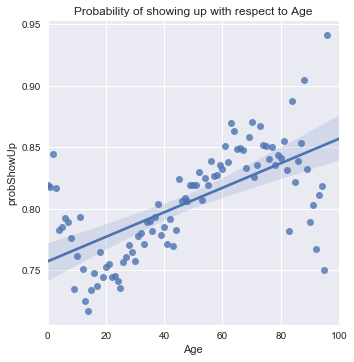

In [26]:
sns.lmplot(data = prob_show(df, 'Age'), x = 'Age', y = 'probShowUp', fit_reg = True)
plt.xlim(0, 100)
plt.title('Probability of showing up with respect to Age')
plt.show()

No-show rate of these appointments are highly dependent on the age of the appointee. for Example: Ages from 14 to 24 years have higher cancellations rate.

In [27]:

sns.lmplot(data = prob_show(df, 'AwaitingTime'), x = 'AwaitingTime', 
           y = 'probShowUp', fit_reg = True)
plt.title('Probability of showing up with respect to Awaiting Time')
plt.ylim(0, 1)
plt.show()


No-show rate of medical appointments is has no dependency on AwaitingTime period.


### Number of Appointments Missed by Patient


Probability of showing up with respect decrease to the Number of previous missed appiontments

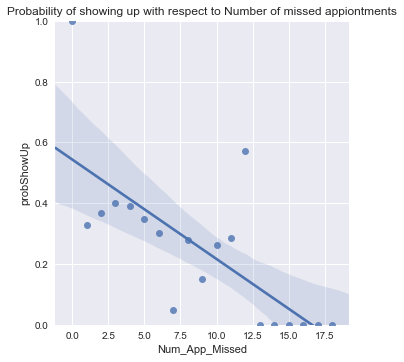

In [29]:
sns.lmplot(data = prob_show(df, 'Num_App_Missed'), x = 'Num_App_Missed', 
           y = 'probShowUp', fit_reg = True)
plt.title('Probability of showing up with respect to Number of missed appiontments')
plt.ylim(0, 1)
plt.show()

Hence, Number of missed appiontments, AwaitingTime and Age are good predictors of ٍShowing up at the appointment.

In [33]:
def prob_categorical(df, group_by):
    rows = []
    for item in group_by:
        #np.array((df[item] == level) & (df['No_show'] == 0), dtype = bool)
        for level in df[item].unique():
            row = {'Condition': item}
            total = len(df[df[item] == level])
            #n = len(df[(df[item] == level) & (df['No_show'] == 0)])
            n = len(np.array(df[(df[item] == level) & (df['No_show'] == 0)], dtype = bool))
            row.update({'Level': level, 'Probability': n / total})
            rows.append(row)
    return pd.DataFrame(rows)

### Probability of diseases and scholarship given to a no-show

In [34]:
sns.barplot(data = prob_categorical(df,['Hypertension', 'Diabetes', 'Alcoholism', 'Scholarship']),
            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set2')
plt.title('probability of diseases and scholarship given to a no-show')
plt.ylabel('Probability')
plt.show()

Clearly, Alcoholism and Diabetes are not good predictors of Status, since the probability of showing up depends feebly on the Scholarship and Hypertension.

### Probability of showing up on number of handcaps a person presents'

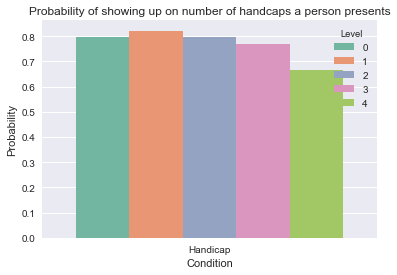

In [36]:
sns.barplot(data = prob_categorical(df,['Handicap']),
            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set2')
plt.title('Probability of showing up on number of handcaps a person presents')
plt.ylabel('Probability')
plt.show()

Hence, we see showing up decrease on increase number of handcaps a person presents especially after 2 handcaps.

### Probability of showing up based on Day of the week

In [37]:
sns.barplot(data = prob_categorical(df,['DayOfWeek']),
            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set2')
plt.title('Probability of showing up based on Day of the week')
plt.ylabel('Probability')
plt.show()

After analyzed the probability of showing up with respect to Day of the week,probability decrease on weekends.


## Conclusions
*   Certain age groups appear to be more likely to miss appointments.
*   SMS reminder didn't increase show ups.
*  Number of missed appiontments and AwaitingTime and Age are good predictors of ٍShowing up.
*  Patients with scholarships (low income) appeared to have a higher percentage of not attending appointments.

## Limitations of dataset
The are a number of limitations with the No-show appointments Dataset, which are caused by:

*  outliers in data-  To handle age outliers delete age greater than 0 and less than or equal 95

### Sample are appointments from capital city of Espirito Santo State - Vitoria - Brazil only and that could also impact the results as we don't know if this is a random sample or if the selection of the data is biased or unbiased.